In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
from tardis.model import Radial1DModel
from tardis.io.config_reader import Configuration

from tardis.plasma.properties import Density, Abundance, IsotopeAbundance, IsotopeNumberDensity, AtomicData, AtomicMass, IsotopeMass, NumberDensity, SelectedAtoms
from tardis.plasma.base import BasePlasma
from tardis.io.atom_data import AtomData

from tardis.energy_input.indivisible_packets import main_gamma_ray_loop

In [24]:
# Read the config file
config = Configuration.from_yaml("/Users/anirbandutta/Downloads/tardis/tardis/io/tests/data/tardis_configv1_density_exponential_nebular.yml")

In [25]:
import astropy.units as u
config.model.structure.velocity.start = 10000 * u.km /u.s
config.model.structure.density.rho_0 = 3.e2 * u.g / (u.cm ** 3)
config.supernova.time_explosion = 150.0 * u.d

In [26]:
config.atom_data = "kurucz_cd23_chianti_H_He.h5"

In [27]:
model = Radial1DModel.from_config(config)

In [28]:
# Construct Plasma

input = [Density, Abundance, IsotopeAbundance, AtomicData, AtomicMass, IsotopeNumberDensity, NumberDensity, SelectedAtoms, IsotopeMass]

plasma = BasePlasma(plasma_properties=input, density = model.density, 
                    abundance=model.abundance, isotope_abundance=model.raw_isotope_abundance,
                    atomic_data = AtomData.from_hdf(config.atom_data))

In [29]:
num_packets = 500000

np.random.seed(1)

In [30]:

# Compute energy deposition rate
# ejecta_energy_df is the deposited energy
# ejecta_plot_energy_df is information for plotting
# escape_energy is the escaping energy
# decayed_packet_count is the number of packets created per shell
# energy_plot_positrons is the deposited energy from positrons
# estimated_deposition is the deposited energy from the Kasen (2006) estimator (currently not functional)
(
    energy_df,
    energy_plot_df,
    escape_energy,
    decayed_packet_count,
    energy_plot_positrons,
    estimated_deposition
) = main_gamma_ray_loop(
    num_packets,
    model,
    plasma,
    time_steps=50,
    time_end=200.0,
    path_to_decay_data="/Users/anirbandutta/Downloads/decay_radiation.h5"
)

ejecta_energy = energy_plot_df["energy_input"]
ejecta_energy_r = energy_plot_df["energy_input_r"]
energy_input_time = energy_plot_df["energy_input_time"]
energy_input_type = energy_plot_df["energy_input_type"]

Total gamma-ray energy
2.0658021785209893e+49
Total positron energy
4.402334422860816e+47
Initializing packets
Total packets: 499998
Energy per packet 2.5787549449214336e+52
Total positron energy from packets
4.385159652705431e+47
Total CMF energy
4.36474542746653e+57
Total RF energy
4.367646453477919e+57
Entering gamma ray loop for 499998 packets
Escaped packets: 486991
Scattered packets: 7387
Final energy to test for conservation
4.3673512204980473e+57


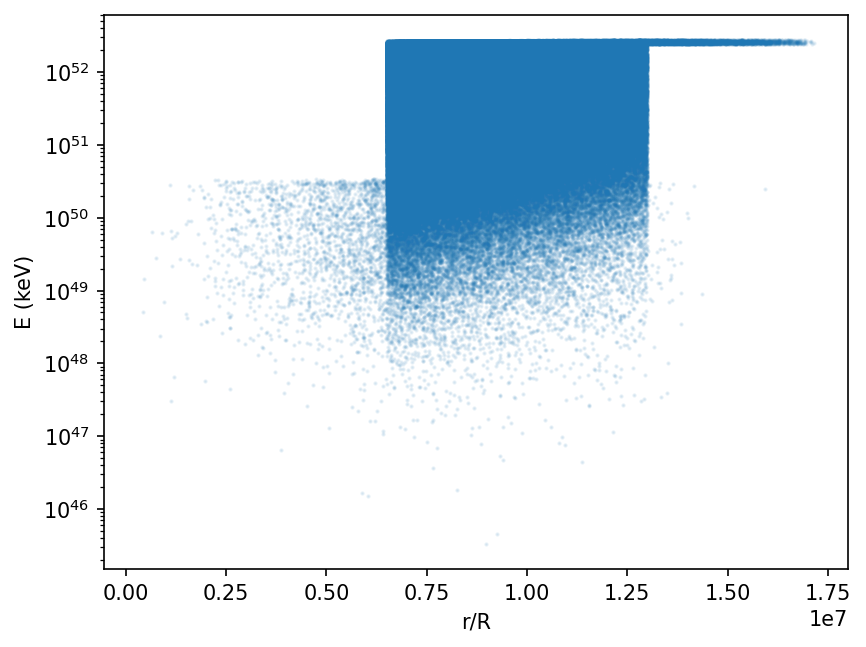

In [31]:
fig = plt.figure(dpi=150, facecolor='w')
ax = fig.add_subplot(111)

scatter = ax.scatter(np.array(ejecta_energy_r)/np.max(model.v_outer.value), np.array(ejecta_energy), s=1, alpha=0.1)
ax.set_xlabel("r/R")
ax.set_ylabel("E (keV)")
ax.semilogy();

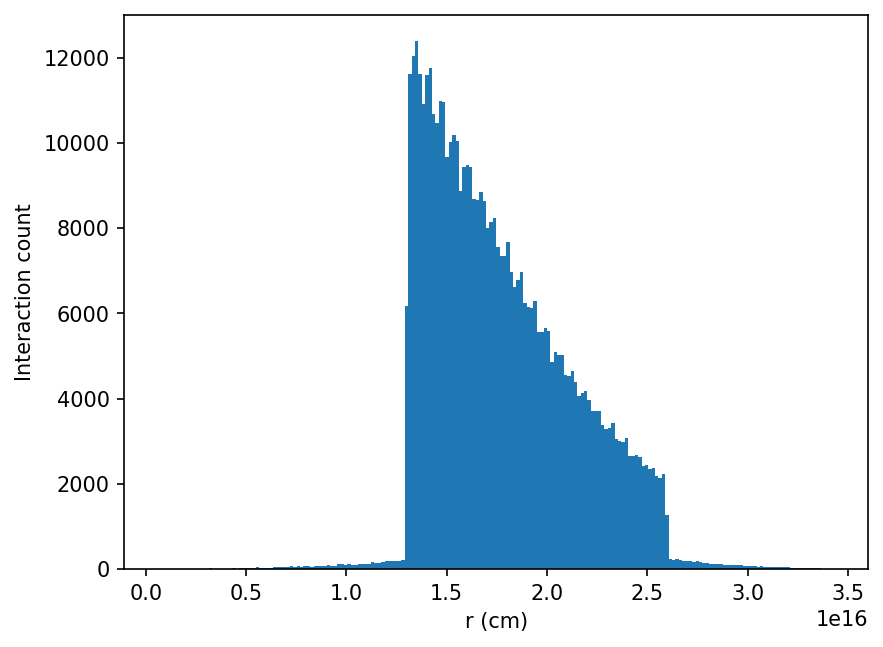

In [32]:
fig = plt.figure(dpi=150, facecolor='w')
ax = fig.add_subplot(111)
ax.hist(np.array(ejecta_energy_r), bins=200)
#ax.set_xlim(0, 1)
ax.set_xlabel("r (cm)")
ax.set_ylabel("Interaction count");

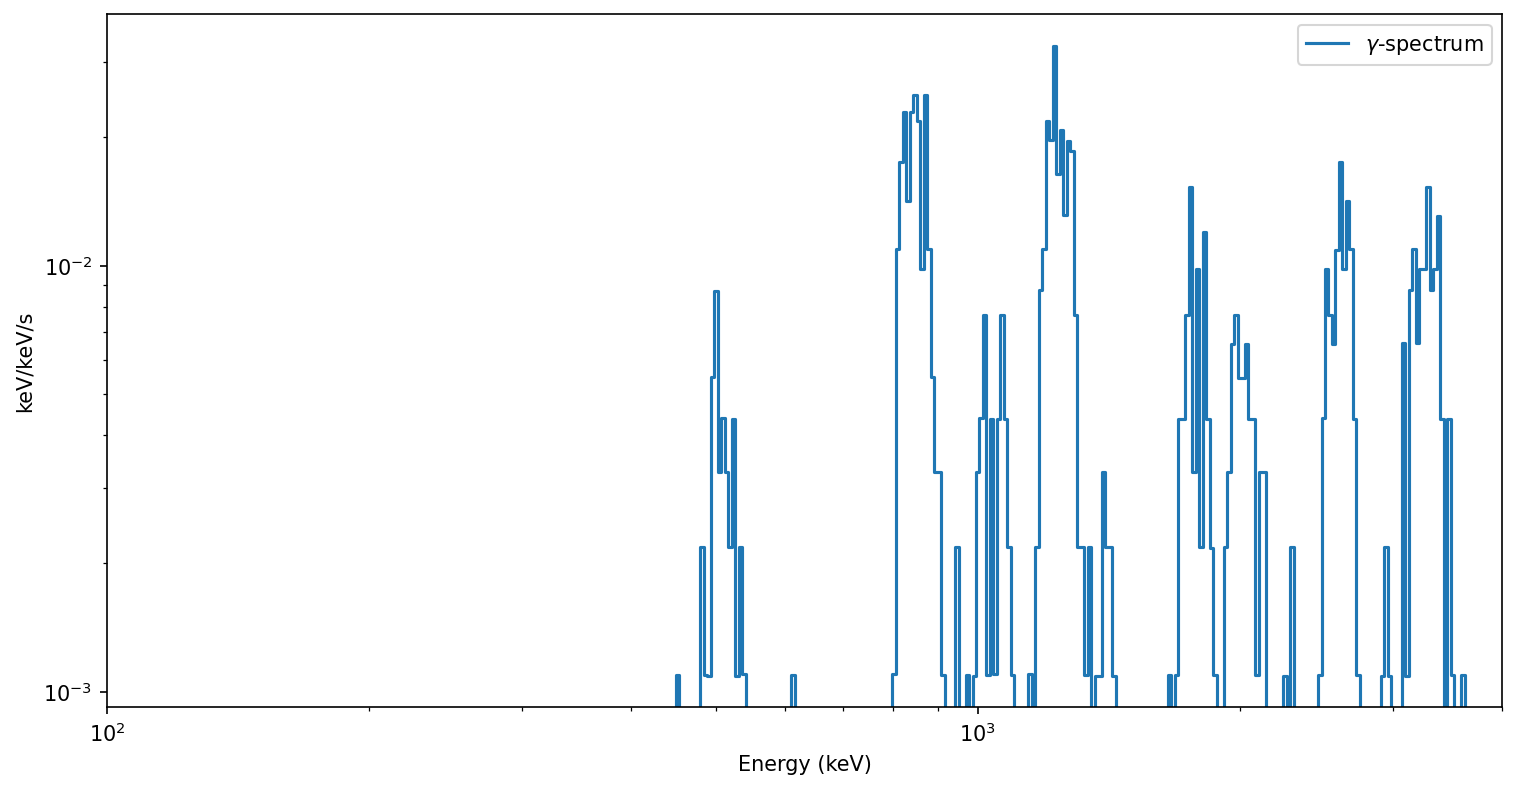

In [33]:
from tardis.energy_input.energy_source import read_artis_lines

#ni56_lines = read_artis_lines("ni56", "~/Downloads/tardisnuclear/")
#co56_lines = read_artis_lines("co56", "~/Downloads/tardisnuclear/")

plt.figure(figsize=(12, 6), dpi=150)
plt.step(escape_energy.index, escape_energy.iloc[:,49], label="$\gamma$-spectrum", where="post")
plt.xlabel("Energy (keV)")
plt.ylabel("keV/keV/s");
plt.loglog()
plt.xlim(100, 4000)
#plt.ylim(0.01, 100)
#plt.vlines(ni56_lines.energy*1000, 0.1, 0.2, color="k", label="Ni56")
#plt.vlines(co56_lines.energy*1000, 0.1, 0.2, color="r", label="Co56")
plt.legend()